<a href="https://colab.research.google.com/github/guilhermegranchopro/Prometheus/blob/main/Prometheus/Alpaca/Alpaca3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpaca-trade-api

In [ ]:
import yfinance as yf

# Defina o símbolo da empresa
ticker_symbol = 'AAPL'  # Exemplo com Apple

# Obtenha os dados históricos
ticker_data = yf.Ticker(ticker_symbol)
historical_data = ticker_data.history(period='max')

# Obtenha a data da primeira cotação
first_trading_date = historical_data.index[0]
print(f"A empresa {ticker_symbol} começou a ser cotada na bolsa em:", first_trading_date.strftime("%Y-%m-%d"))

def get_start_date(symbol):
    ticker_data = yf.Ticker(symbol)
    historical_data = ticker_data.history(period='max')
    first_trading_date = historical_data.index[0]
    return first_trading_date

A empresa AAPL começou a ser cotada na bolsa em: 1980-12-12


In [ ]:
import pandas as pd
from datetime import datetime, timedelta, timezone

# Obter a data e hora atuais
current_date_time = datetime.now()

# Formatar a data como string
current_date = current_date_time.strftime("%Y-%m-%d")
print(f"Hoje é: {current_date}")

def get_end_date(symbol):
    # Obter a data e hora atuais
    current_date_time = datetime.now()
    # Make start timezone aware
    current_date_time = current_date_time.replace(tzinfo=timezone.utc)
    return current_date_time

Hoje é: 2024-09-12


In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd
import time
from datetime import datetime, timedelta

def alpaca_autentification():
    # Replace with your Alpaca API credentials
    API_KEY = 'AK1RX6F8W6QX207XPLDF'
    SECRET_KEY = 'WaPoTTxkQBGzC51LajCdyw8Pl6svbINa9eDu9TMK'
    BASE_URL = 'https://api.alpaca.markets'  # Use 'https://api.alpaca.markets' for live trading

    # Initialize the Alpaca API
    api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')

    return api

# Function to fetch data in chunks to avoid rate limits
def fetch_data(symbol, start, end, timeframe, api):
    all_data = []
    current_start = start

    while current_start < end:
        current_end = current_start + timedelta(days=7)
        if current_end > end:
            current_end = end

        # Fetch the historical data
        bars = api.get_bars(
            symbol,
            timeframe,
            start=current_start.strftime('%Y-%m-%d'),
            end=current_end.strftime('%Y-%m-%d')
        ).df

        all_data.append(bars)
        current_start = current_end
        time.sleep(1)  # Adjust sleep interval based on rate limits

    return pd.concat(all_data)

In [ ]:
pip install python-Levenshtein

In [ ]:
pip install fuzzywuzzy

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_file_name(symbol, max_period, start_date, end_date,
                     timeframe, fisrt_marker, second_marker, third_marker,
                     n_rows, sort, relative_first_marker, relative_second_marker,
                     relative_third_marker, decimals, LSTM_boolean, epochs,
                     early_stopping, call_back, patience, batch_size,
                     test_loss, test_accuracy, model_file):

    # Nome aproximado do arquivo
    if model_file == True:
        nome_aproximado = 's=' + symbol + '+' + 'mp=' + str(max_period) + '+' + 'sd=' + \
        start_date + '+' + 'ed=' + end_date + '+' + 'tf=' + timeframe + '+' + \
        'fm=' + fisrt_marker + '+' + 'sm=' + second_marker + '+' + \
        'tm=' + third_marker + '+' + 'r=' + str(n_rows) + '+' + \
        'sort=' + str(sort) + '+' + 'rfm=' + str(relative_first_marker) + '+' + \
        'rsm=' + str(relative_second_marker) + '+' + \
        'rtm=' + str(relative_third_marker) + '+' + \
        'd=' + decimals + '+' + 'Lb=' + str(LSTM_boolean) + '+' + 'e=' + str(epochs) + '+' + \
        'es=' + str(early_stopping) + '+' + 'cb=' + call_back + '+' + \
        'p=' + str(patience) + '+' + 'bs=' + str(batch_size) + '+' + \
        'tl=' + str(test_loss) + '+' + 'ta=' + str(test_accuracy) + '.keras'
    else:
        nome_aproximado = 's=' + symbol + '+' + 'mp=' + str(max_period) + '+' + 'sd=' + \
        start_date + '+' + 'ed=' + end_date + '+' + 'tf=' + timeframe + '.csv'

    return nome_aproximado

In [ ]:
import os
from fuzzywuzzy import process

def old_dataset_function(symbol, max_period, start_date, end_date,
                timeframe, fisrt_marker, second_marker, third_marker,
                n_rows, sort, relative_first_marker, relative_second_marker,
                relative_third_marker, decimals, LSTM_boolean, epochs,
                early_stopping, call_back, patience, batch_size,
                test_loss, test_accuracy, model_file):

    # Defina o caminho do diretório no Google Drive
    diretorio = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Dataset/Raw Data'

    # Nome aproximado do arquivo
    nome_aproximado = create_file_name(symbol, max_period, start_date, end_date,
                                      timeframe, fisrt_marker, second_marker, third_marker,
                                      n_rows, sort, relative_first_marker, relative_second_marker,
                                      relative_third_marker, decimals, LSTM_boolean, epochs,
                                      early_stopping, call_back, patience, batch_size,
                                      test_loss, test_accuracy, model_file)

    # Lista todos os arquivos no diretório
    arquivos = os.listdir(diretorio)

    # Encontra o arquivo mais próximo
    if process.extractOne(nome_aproximado, arquivos):
        arquivo_mais_proximo, pontuacao = process.extractOne(nome_aproximado, arquivos)
    else:
        arquivo_mais_proximo = None
        pontuacao = None

    if arquivo_mais_proximo and pontuacao==100:
        caminho_do_modelo = os.path.join(diretorio, arquivo_mais_proximo)
        print("Nome do arquivo mais próximo:")
        print(arquivo_mais_proximo)
        print()
        print("Caminho completo do modelo:")
        print(caminho_do_modelo)
        print()
        print("Pontuação de similaridade:")
        print(pontuacao)
        old_dataset = True
    else:
        print("Nenhum arquivo próximo encontrado.")
        caminho_do_modelo = ''
        old_dataset = False

    return old_dataset, caminho_do_modelo

In [ ]:
def get_all_data(symbol = 'AAPL', max_period = True, start_date = '', end_date= '', timeframe = '1Min'):
    api = alpaca_autentification()

    if max_period and start_date == '' and end_date == '':
        start_date = get_start_date(symbol)
        end_date = get_end_date(symbol)
    elif start_date != '' and end_date != '':
        start_date = datetime.strptime(start_date, '%Y-%m-%d')
        end_date = datetime.strptime(end_date, '%Y-%m-%d')
    else:
        start_date = datetime(2022, 12, 31)
        end_date = datetime(2023, 12, 31)

    # Fetch the historical data
    apple_data = fetch_data(symbol, start_date, end_date, timeframe, api)
    return apple_data

In [ ]:
# Function to prepare the data
def prepare_data(data, fisrt_marker, second_marker, third_marker):
    # Selecionar colunas relevantes e fazer uma cópia para evitar advertências
    data_selected = data[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap']].copy()

    # Calcular a média entre 'Open' e 'Close' usando .loc para evitar o SettingWithCopyWarning
    data_selected.loc[:, 'average_oc'] = data_selected[['open', 'close']].mean(axis=1)

    # Calcular a média entre 'High' e 'Low' usando .loc para evitar o SettingWithCopyWarning
    data_selected.loc[:, 'average_hl'] = data_selected[['high', 'low']].mean(axis=1)

    # Selecionar as colunas finais
    if third_marker != '':
        data_final = data_selected[[fisrt_marker, second_marker, third_marker]]
    else:
        data_final = data_selected[[fisrt_marker, second_marker]]

    return data_final

In [ ]:
import numpy as np

# Função para criar as matrizes e os labels
def create_matrices(data_final, n = 12, fisrt_marker = 'volume', second_marker = 'vwap', third_marker = '', relative_fisrt_marker = True, relative_second_marker = False, relative_third_marker = False):
    num_rows = data_final.shape[0]
    num_matrices = num_rows // n  # Número de matrizes completas que podemos formar

    matrices = []
    matrices_y = []

    for i in range(num_matrices):
        start_idx = i * n
        end_idx = start_idx + n
        matrix = data_final.iloc[start_idx:end_idx].copy()

        if relative_fisrt_marker:
            # Calcular a soma da coluna de volume
            volume_sum = matrix[fisrt_marker].sum()

            # Tornar a coluna do volume relativa
            matrix[fisrt_marker] = matrix[fisrt_marker] / volume_sum

            # Converter para valores numpy e adicionar à lista de matrizes
            matrices.append(matrix.values)

        if relative_second_marker:
            # Calcular a soma da coluna de volume
            volume_sum = matrix[second_marker].sum()

            # Tornar a coluna do volume relativa
            matrix[second_marker] = matrix[second_marker] / volume_sum

            # Converter para valores numpy e adicionar à lista de matrizes
            matrices.append(matrix.values)

        if relative_third_marker:
            # Calcular a soma da coluna de volume
            volume_sum = matrix[third_marker].sum()

            # Tornar a coluna do volume relativa
            matrix[third_marker] = matrix[third_marker] / volume_sum

            # Converter para valores numpy e adicionar à lista de matrizes
            matrices.append(matrix.values)

        # Criar labels
        if i > 0:  # Ignorar a primeira matriz para alinhamento correto
            first_value = matrices[i][0, 1]
            last_value = matrices[i][n-1, 1]
            delta = last_value - first_value
            delta_bi = 1 if delta >= 0 else 0
            matrices_y.append(delta_bi)

    return matrices, matrices_y

def sort_matrices(matrices):
    # Ordenar as linhas de cada matriz por ordem decrescente da coluna Average (segunda coluna)
    matrices_x = []
    for matrix in matrices:
        sorted_indices = np.argsort(matrix[:, 1])[::-1]
        sorted_matrix = matrix[sorted_indices]
        matrices_x.append(sorted_matrix)
    return matrices_x

def tensor_creator(matrices_x, matrices_y):
    # Converter listas para arrays numpy
    matrices_x = np.array(matrices_x)
    matrices_y = np.array(matrices_y)
    return matrices_x, matrices_y

In [ ]:
def get_dataset(company_data, n_rows, sort = True, fisrt_marker = 'volume', second_marker = 'vwap' ,
                third_marker = '', relative_fisrt_marker = True, relative_second_marker = False,
                relative_third_marker = False, decimals = ''):
    matrices_x = []
    matrices_y = []

    matrices_x, matrices_y = create_matrices(company_data, n_rows, fisrt_marker, second_marker, third_marker, relative_fisrt_marker, relative_second_marker, relative_third_marker)

    if sort:
        matrices_x = sort_matrices(matrices_x)

    # Remover a última matriz de matrices_x para alinhamento com matrices_y
    if matrices_x:
        matrices_x.pop()

    matrices_x, matrices_y = tensor_creator(matrices_x, matrices_y)

    if decimals != '':
        matrices_x = np.round(matrices_x, decimals = decimals)
    return matrices_x, matrices_y

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(matrices_x, matrices_y, LSTM = True):

    if LSTM:
        # Total de amostras
        n_samples = matrices_x.shape[0]

        # Índices para divisão
        train_size = int(0.6 * n_samples)  # 60% para treino
        val_size = int(0.2 * n_samples)    # 20% para validação
        test_size = n_samples - train_size - val_size  # 20% para teste

        # Dividir os dados sequencialmente
        X_train = matrices_x[:train_size]
        y_train = matrices_y[:train_size]

        X_val = matrices_x[train_size:train_size + val_size]
        y_val = matrices_y[train_size:train_size + val_size]

        X_test = matrices_x[train_size + val_size:]
        y_test = matrices_y[train_size + val_size:]
    else:
        # Dividir os dados em conjuntos de treinamento + validação e teste
        X_train_val, X_test, y_train_val, y_test = train_test_split(matrices_x, matrices_y, test_size=0.2, random_state=42)

        # Dividir o conjunto de treinamento + validação em treinamento e validação
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    return X_train, X_val, X_test, y_train, y_val, y_test


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# Função para construir a rede neural
def build_model(input_shape, LSTM_boolean=True):
    warnings.filterwarnings('ignore', category=UserWarning, module='keras')
    model = Sequential()

    if LSTM_boolean:
        model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(64, return_sequences=False))
        model.add(Dropout(0.2))
    else:
        model.add(Flatten(input_shape=input_shape))
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    # Compilando o modelo com uma taxa de aprendizado ajustada
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
def model_training(model, X_train, X_val, X_test, y_train, y_val, y_test, epochs=5, early_stopping = True, call_back = 'val_accuracy', patience = 2, batch_size=32):

    # Treinar o modelo
    print("Treinando o modelo...")

    if early_stopping:
        early_stopping = EarlyStopping(monitor=call_back, patience=patience, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])
    else:
        history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

    print()

    # Avaliar o modelo nos dados de teste
    print("Avaliação no conjunto de teste:")
    test_loss, test_accuracy = model.evaluate(X_test, y_test)

    return model, history, test_loss, test_accuracy

In [ ]:
# Plotar a precisão e a perda ao longo das épocas
import matplotlib.pyplot as plt

def graphics_analysis(history):

    # Precisão
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Perda
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

As primeiras possibilidades de cada variável são aquelas as quais inicialmnete pensas-te que faziam mais sentido:

* symbol = 'AAPL', (retira do ficheito execel, tens o código que extrai)
* max_period = True, (podes ter erros por excesso de pedidos do API)
* start_date = '', '2022-10-31', (1 ano funciona bem para test runs)
* end_date = '', '2023-10-31', (1 ano funciona bem para test runs)
* timeframe = '1Min', '5Min', (mais de 5Min parece perder sentido a teoria)
* fisrt_marker = 'volume', 'close', 'high', 'low', 'trade_count', 'open', 'vwap', 'average_oc', 'average_hl', (a ideia inicial é ver o volume relativo, mas pode ser interessante estudar o trade_count)
* second_marker = 'vwap', 'volume', 'close', 'high', 'low', 'trade_count', 'open', 'average_oc', 'average_hl', (a ideia inicial era ver a média entre o high e o low - 'average_hl', mas fica na duvida ver a média entre o open e o close - 'average_oc', pode também ser muito interessante investigar o vwap)
* third_marker = '', 'volume', 'close', 'high', 'low', 'trade_count', 'open', 'vwap', 'average_oc', 'average_hl', (não pensas te em usar uma terceira coluna para criar as matrizes, mas se os resultados impiricos assim o provarem usa)
* n_rows = 12, 10, 15, 30, 5, (pensa no timeframe quando fazes isso, o 12 pareceu ser o melhor em testes impiricos)
* sort = True, (tens de pensar na sequencia temporal se faz sentido manter ou não)
* relative_first_marker = True, (tens de pensar em que marker correspondente estás a usar, pensa se matemáticamente faz sentido ou não colocares o marcador com valores relativos para todo o tensor, faltam te dados impiricos, o volume pensas te inicialmnete deixar em impirico para o tensor para normalizares os tensores)
* relative_second_marker = False, (tens de pensar em que marker correspondente estás a usar, pensa se matemáticamente faz sentido ou não colocares o marcador com valores relativos para todo o tensor, faltam te dados impiricos)
* relative_third_marker = False, (tens de pensar em que marker correspondente estás a usar, pensa se matemáticamente faz sentido ou não colocares o marcador com valores relativos para todo o tensor, faltam te dados impiricos)
* decimals = '', 3, 4 (tens de ver o que os dados impiricos te dizem se com arrendondamentos facilitas ou n a vida do AI)
* LSTM_boolean = True, (em caso de falso não usas um LSTM e partes do precipio que a relação causal deixa de ser importante para a cosntrução do tensor, quando normalizas os dados a esperança seria de não teres de usar um LSTM)
* epochs = 5, (este numero tende a ser irrelevante porque tens um checkpoint de callback referente ao melhor resultado de validation accuracy)
* early_stopping = True, (podes ligar ou desligar de forma automática o early_stopping, ou seja, o call back aqui)
* call_back = 'val_accuracy', 'val_loss', 'accuracy', 'loss' (escolhes o paramtero que monitora o call back)
* patience = 2, 50, 100, 500, 1000 (escolhes a paciencia do call back)
* batch_size = 64, 16, 32, 128, 256, 512 (varias com o tramanho do dataset, mas pensa que tens conseguido datasets bem grandes portanto usa os maiores valores)

In [ ]:
symbol = 'AAPL'
max_period = True
start_date = '2016-10-31'
end_date = '2023-12-31'
timeframe = '5Min'
fisrt_marker = 'volume'
second_marker = 'vwap'
third_marker = ''
n_rows = 12
sort = True
relative_first_marker = True
relative_second_marker = False
relative_third_marker = False
decimals = ''
LSTM_boolean = True
epochs = 5
early_stopping = True
call_back = 'val_accuracy'
patience = 2
batch_size = 64

In [ ]:
import pandas as pd

old_dataset, caminho_do_modelo = old_dataset_function(symbol, max_period, start_date, end_date,
                                  timeframe, fisrt_marker, second_marker, third_marker,
                                  n_rows, sort, relative_first_marker, relative_second_marker,
                                  relative_third_marker, decimals, LSTM_boolean, epochs,
                                  early_stopping, call_back, patience, batch_size, 0, 0, False)

if old_dataset:
    company_data = pd.read_csv(caminho_do_modelo, index_col=0)
else:
    company_data = get_all_data(symbol, max_period, start_date, end_date, timeframe)

print(company_data)
print(company_data.shape)
print()

Nenhum arquivo próximo encontrado.
                              close    high       low  trade_count      open  \
timestamp                                                                      
2016-10-31 08:00:00+00:00  113.9000  113.90  113.7500            6  113.8900   
2016-10-31 08:05:00+00:00  113.4000  113.76  113.4000            3  113.7600   
2016-10-31 09:00:00+00:00  113.7600  113.76  113.7600            2  113.7600   
2016-10-31 09:20:00+00:00  113.9500  113.95  113.8800            2  113.8800   
2016-10-31 10:05:00+00:00  113.7500  113.75  113.7500            1  113.7500   
...                             ...     ...       ...          ...       ...   
2023-12-30 00:35:00+00:00  192.1200  192.14  192.1100           44  192.1400   
2023-12-30 00:40:00+00:00  192.1500  192.15  192.1118           41  192.1118   
2023-12-30 00:45:00+00:00  192.2000  192.22  192.1500           37  192.1500   
2023-12-30 00:50:00+00:00  192.2200  192.24  192.1600           54  192.1600   
2023-

In [ ]:
company_data_prepared = prepare_data(company_data, fisrt_marker, second_marker, third_marker)

print(company_data_prepared)
print(company_data_prepared.shape)
print()

                           volume        vwap
timestamp                                    
2016-10-31 08:00:00+00:00     500  113.845860
2016-10-31 08:05:00+00:00     823  113.650304
2016-10-31 09:00:00+00:00     144  113.780833
2016-10-31 09:20:00+00:00     275  113.905455
2016-10-31 10:05:00+00:00     245  113.750000
...                           ...         ...
2023-12-30 00:35:00+00:00    1639  192.130354
2023-12-30 00:40:00+00:00    2863  192.135717
2023-12-30 00:45:00+00:00    3105  192.204240
2023-12-30 00:50:00+00:00    8060  192.221821
2023-12-30 00:55:00+00:00    6212  192.183319

[369080 rows x 2 columns]
(369080, 2)



In [ ]:
matrices_x, matrices_y = get_dataset(company_data_prepared, n_rows, sort, fisrt_marker, second_marker , third_marker, relative_first_marker, relative_second_marker, relative_third_marker, decimals)

print(matrices_x)
print(matrices_x.shape)
print(matrices_y)
print(matrices_y.shape)
print()

[[[2.55980639e-02 1.13905455e+02]
  [1.11700642e-01 1.13870000e+02]
  [4.65419343e-02 1.13845860e+02]
  ...
  [1.21009029e-01 1.13738462e+02]
  [1.86167737e-02 1.13720000e+02]
  [7.66080238e-02 1.13650304e+02]]

 [[8.74403410e-02 1.13793012e+02]
  [2.04180598e-02 1.13757500e+02]
  [3.90571961e-01 1.13734021e+02]
  ...
  [1.65896736e-02 1.13644323e+02]
  [1.56963835e-01 1.13638618e+02]
  [1.65896736e-01 1.13628711e+02]]

 [[2.32956492e-03 1.13786212e+02]
  [6.06592053e-04 1.13780000e+02]
  [4.24614437e-04 1.13772694e+02]
  ...
  [3.23410996e-03 1.13578300e+02]
  [5.31160917e-04 1.13558154e+02]
  [2.23570344e-01 1.13368599e+02]]

 ...

 [[3.77526740e-02 1.92689513e+02]
  [1.74833685e-02 1.92675211e+02]
  [1.08355699e-01 1.92668680e+02]
  ...
  [2.69245237e-02 1.92536548e+02]
  [4.76995453e-01 1.92534327e+02]
  [2.32410485e-02 1.92532662e+02]]

 [[5.30569708e-02 1.92568595e+02]
  [1.15840667e-02 1.92545147e+02]
  [1.24735989e-01 1.92506790e+02]
  ...
  [1.12623900e-01 1.92384073e+02]
  [4

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(matrices_x, matrices_y, LSTM_boolean)

# Exibir as formas dos arrays resultantes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print()

Shape of X_train: (18453, 12, 2)
Shape of y_train: (18453,)
Shape of X_val: (6151, 12, 2)
Shape of y_val: (6151,)
Shape of X_test: (6151, 12, 2)
Shape of y_test: (6151,)



In [ ]:
if third_marker == '':
  input_shape = (n_rows, 2)
else:
  input_shape = (n_rows, 3)
model = build_model(input_shape, LSTM_boolean)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 12, 64)              │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,241 (196.25 KB)

 Trainable params: 50,241 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model, history, test_loss, test_accuracy = model_training(model, X_train, X_val, X_test, y_train, y_val, y_test, epochs, early_stopping, call_back, patience, batch_size)

Treinando o modelo...
Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5121 - loss: 0.6973 - val_accuracy: 0.5202 - val_loss: 0.6927
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5108 - loss: 0.6948 - val_accuracy: 0.5202 - val_loss: 0.6924
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5219 - loss: 0.6926 - val_accuracy: 0.5202 - val_loss: 0.6924

Avaliação no conjunto de teste:
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5151 - loss: 0.6933


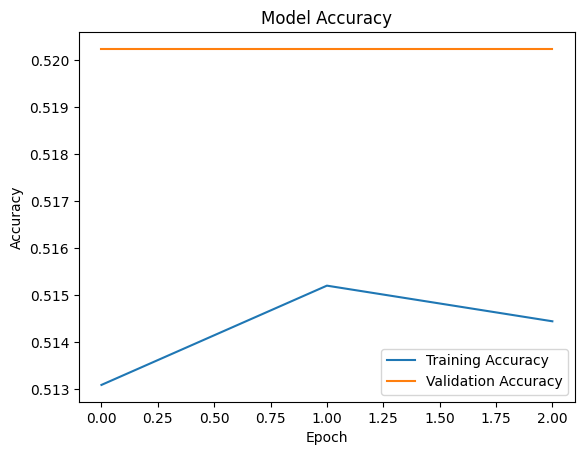

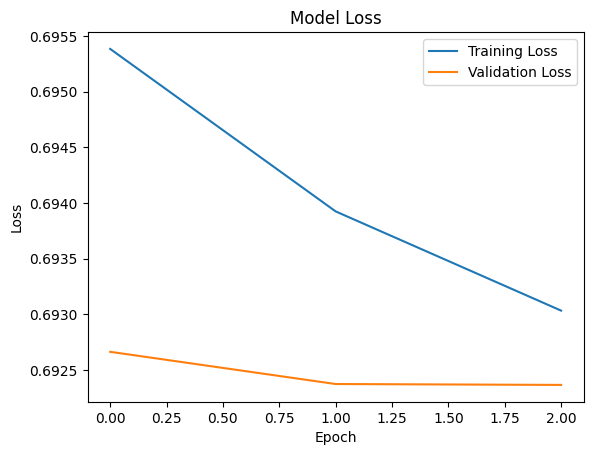

In [ ]:
graphics_analysis(history)

In [ ]:
import os

# Defina o caminho do diretório no Google Drive
caminho_para_salvar_modelo = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Neural Network/Models'

# Verifique se o diretório existe, caso contrário, crie-o
if not os.path.exists(caminho_para_salvar_modelo):
    print(f"O dirétório {caminho_para_salvar_modelo} não existe.")

file_name = create_file_name(symbol, max_period, start_date, end_date,
                     timeframe, fisrt_marker, second_marker, third_marker,
                     n_rows, sort, relative_first_marker, relative_second_marker,
                     relative_third_marker, decimals, LSTM_boolean, epochs,
                     early_stopping, call_back, patience, batch_size,
                     test_loss, test_accuracy, True)

caminho_completo_modelo = os.path.join(caminho_para_salvar_modelo, file_name)

# Salva o modelo em formato
model.save(caminho_completo_modelo)

print("Ficheiro do Modelo:")
print(file_name)
print()
print("Modelo salvo em:")
print(caminho_para_salvar_modelo)

Ficheiro do Modelo:
s=AAPL+mp=True+sd=2016-10-31+ed=2023-12-31+tf=5Min+fm=volume+sm=vwap+tm=+r=12+sort=True+rfm=True+rsm=False+rtm=False+d=+Lb=True+e=5+es=True+cb=val_accuracy+p=2+bs=64+tl=0.6923301815986633+ta=0.522516667842865.keras

Modelo salvo em:
/content/drive/MyDrive/AI Financial Analisys/Summer Project/Neural Network/Models


In [ ]:
import os

# Defina o caminho do diretório no Google Drive
caminho_para_salvar_dados = '/content/drive/MyDrive/AI Financial Analisys/Summer Project/Dataset/Raw Data'

# Verifique se o diretório existe, caso contrário, crie-o
if not os.path.exists(caminho_para_salvar_dados):
    os.makedirs(caminho_para_salvar_dados)
    print(f"Diretório {caminho_para_salvar_dados} criado com sucesso.")
else:
    print(f"O diretório {caminho_para_salvar_dados} já existe.")

print()

file_name = create_file_name(symbol, max_period, start_date, end_date,
                     timeframe, fisrt_marker, second_marker, third_marker,
                     n_rows, sort, relative_first_marker, relative_second_marker,
                     relative_third_marker, decimals, LSTM_boolean, epochs,
                     early_stopping, call_back, patience, batch_size,
                     test_loss, test_accuracy, False)

# Defina o caminho completo para salvar o arquivo
caminho_completo_dados = os.path.join(caminho_para_salvar_dados, file_name)

# Salve o dataframe no caminho especificado
company_data.to_csv(caminho_completo_dados)

print("Ficheiro dos Dados:")
print(file_name)
print()
print("Dados salvos em:")
print(caminho_para_salvar_dados)

O diretório /content/drive/MyDrive/AI Financial Analisys/Summer Project/Dataset/Raw Data já existe.

Ficheiro dos Dados:
s=AAPL+mp=True+sd=2016-10-31+ed=2023-12-31+tf=5Min.csv

Dados salvos em:
/content/drive/MyDrive/AI Financial Analisys/Summer Project/Dataset/Raw Data
